# Exercice 2

On va faire nos premiers pas avec une analyse simples des données.

## Manipulation d'un DataFrame

On commence par la lecture des données.  


In [1]:
import pandas as pnd

ventes = pnd.read_csv('http://www.kirschpm.fr/cours/PythonDataScience/files/VentesPropre.csv',
                       delimiter=';',header=[0],index_col=[0])

ventes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, FA-2008-0010 to FA-2008-0005
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE FACTURE  47 non-null     object 
 1   CODE CLIENT   47 non-null     object 
 2   SECTEUR       47 non-null     object 
 3   VENDEUR       47 non-null     object 
 4   MONTANT       47 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.2+ KB


In [2]:
ventes.head(10)

,DATE FACTURE,CODE CLIENT,SECTEUR,VENDEUR,MONTANT
CODE FACTURE,,,,,
FA-2008-0010,2008-03-12,CLI009,AUTOMATISME,BOUVET,752.98
FA-2008-0006,2008-02-04,CLI038,AUTOMATISME,ENGUENT,374.84
FA-2008-0009,2008-03-03,CLI098,ELECTRICITE,BOUVET,935.47
FA-2008-0012,2008-03-31,CLI114,ELECTRICITE,DEVEAUX,752.98
FA-2008-0008,2008-02-22,CLI115,AUTOMATISME,BOUVET,677.36
FA-2008-0027,2008-07-09,CLI145,ELECTRICITE,BOUVET,425.81
FA-2008-0028,2008-07-09,CLI145,AUTOMATISME,ENGUENT,1607.89
FA-2008-0029,2008-07-09,CLI163,AUTOMATISME,BOUVET,1436.91
FA-2008-0017,2008-05-16,CLI204,AUTOMATISME,ENGUENT,2250.72


In [3]:
ventes.tail(10)

,DATE FACTURE,CODE CLIENT,SECTEUR,VENDEUR,MONTANT
CODE FACTURE,,,,,
FA-2008-0019,2008-06-12,CLI300,ELECTRICITE,BOUVET,1039.05
FA-2008-0033,2008-08-14,CLI300,AUTOMATISME,DEVEAUX,535.90
FA-2008-0042,2008-09-15,CLI300,AUTOMATISME,ENGUENT,3667.68
FA-2008-0014,2008-04-18,CLI312,AUTOMATISME,ENGUENT,917.38
FA-2008-0011,2008-03-21,CLI334,ELECTRICITE,BOUVET,348.55
FA-2008-0016,2008-05-07,CLI403,ELECTRICITE,BOUVET,1147.55
FA-2008-0030,2008-07-18,CLI403,ELECTRICITE,DEVEAUX,436.86
FA-2008-0039,2008-09-09,CLI403,AUTOMATISME,BOUVET,3521.80
FA-2008-0007,2008-02-13,CLI512,AUTOMATISME,ENGUENT,935.47


On s'assure que les donnée sont bien formatées. 
Dans notre cas, on doit convertir les dates. 

In [4]:
ventes['DATE FACTURE'] = pnd.to_datetime(ventes['DATE FACTURE'], yearfirst=True)
ventes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, FA-2008-0010 to FA-2008-0005
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE FACTURE  47 non-null     datetime64[ns]
 1   CODE CLIENT   47 non-null     object        
 2   SECTEUR       47 non-null     object        
 3   VENDEUR       47 non-null     object        
 4   MONTANT       47 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.2+ KB


## Requetage (Query & Groupby)

On va alors utiliser query pour récupérer des données et en faire quelques analyses. 

In [5]:
ventes.query("MONTANT > 2000 and `DATE FACTURE` >= '2008-09-01' ")

,DATE FACTURE,CODE CLIENT,SECTEUR,VENDEUR,MONTANT
CODE FACTURE,,,,,
FA-2008-0035,2008-09-01,CLI206,AUTOMATISME,DEVEAUX,3471.13
FA-2008-0041,2008-09-13,CLI222,AUTOMATISME,DEVEAUX,4374.79
FA-2008-0042,2008-09-15,CLI300,AUTOMATISME,ENGUENT,3667.68
FA-2008-0039,2008-09-09,CLI403,AUTOMATISME,BOUVET,3521.80


In [6]:
ventes.query("VENDEUR == 'DEVEAUX' ")

,DATE FACTURE,CODE CLIENT,SECTEUR,VENDEUR,MONTANT
CODE FACTURE,,,,,
FA-2008-0012,2008-03-31,CLI114,ELECTRICITE,DEVEAUX,752.98
FA-2008-0020,2008-06-21,CLI206,AUTOMATISME,DEVEAUX,3659.69
FA-2008-0035,2008-09-01,CLI206,AUTOMATISME,DEVEAUX,3471.13
FA-2008-0045,2008-09-23,CLI206,AUTOMATISME,DEVEAUX,750.88
FA-2008-0024,2008-06-30,CLI209,AUTOMATISME,DEVEAUX,9367.87
FA-2008-0041,2008-09-13,CLI222,AUTOMATISME,DEVEAUX,4374.79
FA-2008-0004,2008-01-17,CLI235,AUTOMATISME,DEVEAUX,606.66
FA-2008-0033,2008-08-14,CLI300,AUTOMATISME,DEVEAUX,535.90
FA-2008-0030,2008-07-18,CLI403,ELECTRICITE,DEVEAUX,436.86


In [7]:
ventes.query("`VENDEUR` == 'DEVEAUX' ").mean(numeric_only=True)

MONTANT    2661.862222
dtype: float64

In [8]:
ventes.groupby(by='VENDEUR').mean()


,MONTANT
VENDEUR,
BOUVET,840.522273
DEVEAUX,2661.862222
ENGUENT,2344.361875


In [9]:
ventes.groupby(by='VENDEUR').size()

VENDEUR
BOUVET     22
DEVEAUX     9
ENGUENT    16
dtype: int64

In [10]:
ventes.groupby(by='SECTEUR').sum()

,MONTANT
SECTEUR,
AUTOMATISME,69800.65
ELECTRICITE,10157.39


## Visualisation

Visualisation des données avec des graphiques.

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: title={'center': 'Nb de ventes par vendeur'}, xlabel='Vendeurs', ylabel='Ventes'>

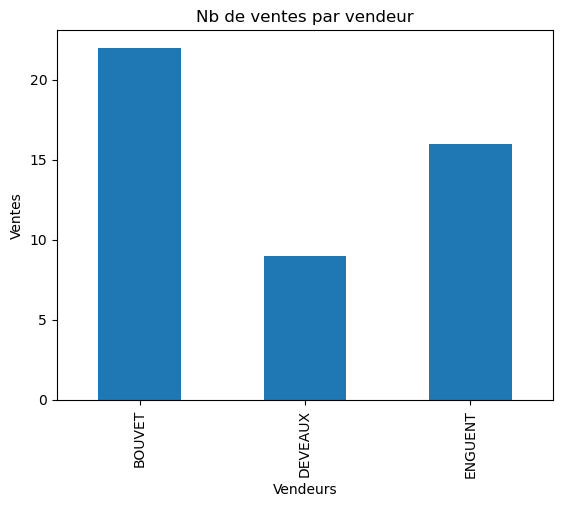

In [12]:
ventes.groupby(by='VENDEUR').size().plot(kind='bar',
                                         title='Nb de ventes par vendeur',
                                         ylabel='Ventes', xlabel='Vendeurs' )

<Axes: title={'center': 'Nb de ventes par secteur'}, ylabel='Secteur'>

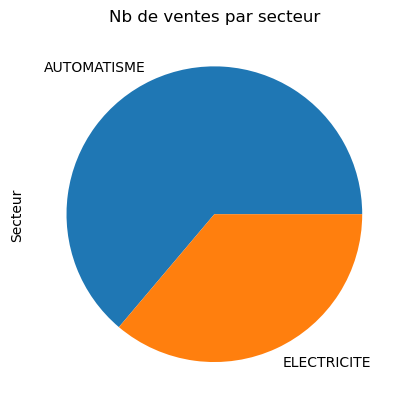

In [13]:
ventes.groupby(by='SECTEUR').size().plot(kind='pie',
                                         title='Nb de ventes par secteur',
                                         ylabel='Secteur' )

<Axes: title={'center': 'MONTANT'}, xlabel='VENDEUR'>

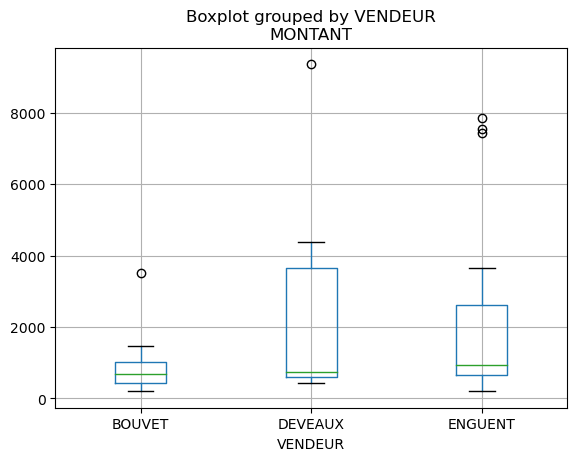

In [14]:
ventes.boxplot(column='MONTANT',by='VENDEUR')


In [15]:
moyennes = ventes.groupby(by='VENDEUR').mean()
print(moyennes)

             MONTANT
VENDEUR             
BOUVET    840.522273
DEVEAUX  2661.862222
ENGUENT  2344.361875


<BarContainer object of 3 artists>

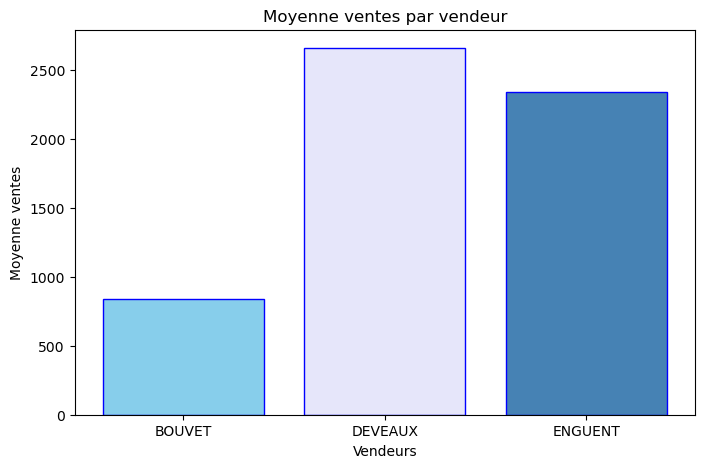

In [16]:
plt.figure(figsize=(8,5))
plt.title('Moyenne ventes par vendeur')
plt.xlabel('Vendeurs')
plt.ylabel('Moyenne ventes')
plt.bar(moyennes.index, moyennes['MONTANT'], 
        color=['skyblue', 'lavender', 'steelblue'], edgecolor='blue')

quelques possibilités plus avancées de parametrage des graphiques...

On va essayer de faire un graphique de barre avec les valeurs moyens et médians des factures de chaque vendeur. 
Pour cela on va d'abord essayer de retrouver ces valeurs grâce à *agg*.

In [27]:
df_moy_med = ventes.groupby(by='VENDEUR')['MONTANT'].agg(['mean','median'])
df_moy_med

,mean,median
VENDEUR,,
BOUVET,840.522273,679.57
DEVEAUX,2661.862222,752.98
ENGUENT,2344.361875,929.72


maintenant qu'on a nous données, on va pouvoir passer au graphique. 


<Axes: xlabel='VENDEUR'>

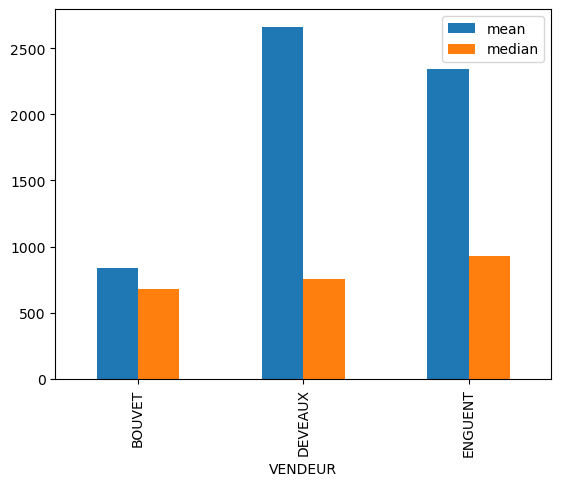

In [28]:
df_moy_med.plot(kind='bar')


c'est particulièrement moche, donc on va essayer d'empiler les valeurs dans une même barre, puis de faire une legère rotation sur les valeurs des labels dans l'axe X.

(array([0, 1, 2]),
 [Text(0, 0, 'BOUVET'), Text(1, 0, 'DEVEAUX'), Text(2, 0, 'ENGUENT')])

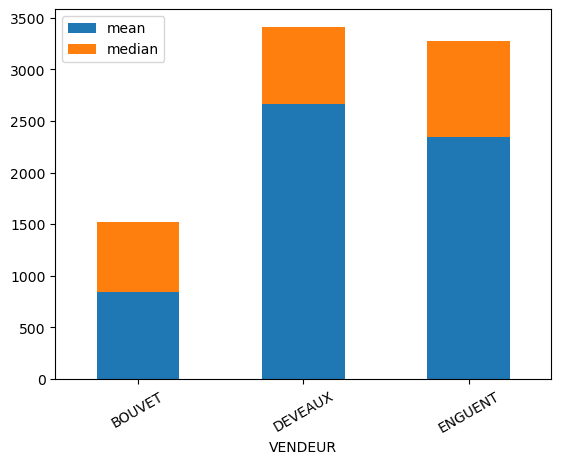

In [29]:
df_moy_med.plot(kind='bar', stacked=True)

plt.xticks(rotation=30, horizontalalignment="center")

intéressant, on va modifier la légende pour l'avoir en français...

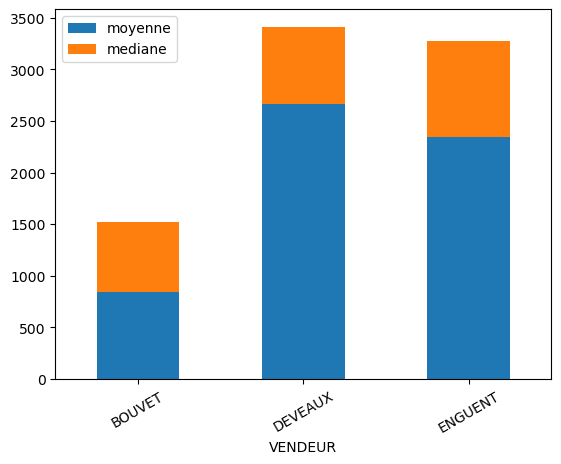

In [30]:
df_moy_med.plot(kind='bar', stacked=True)

plt.xticks(rotation=30, horizontalalignment="center")
plt.legend( ["moyenne", "mediane"])

Maintenant un camemberg pour trouver la proportion des ventes de chaque vendeur sur notre total de ventes...
On veut regarder non seulement le total de ventes (montant) mais également le nombre des factures émises par les vendeurs. 

In [56]:
df_sum_size = ventes.groupby(by='VENDEUR')['MONTANT'].agg(['sum','size'])
df_sum_size

,sum,size
VENDEUR,,
BOUVET,18491.49,22
DEVEAUX,23956.76,9
ENGUENT,37509.79,16


<Axes: ylabel='sum'>

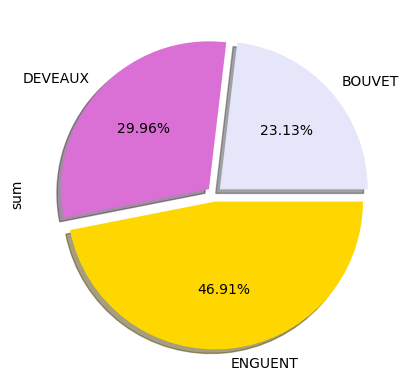

In [54]:
df_sum_size['sum'].plot(kind='pie', autopct='%.2f%%',
                        colors=['lavender', 'orchid','gold'],
                        explode=[0.05, 0.05, 0.05],
                        shadow=True)

<Axes: title={'center': 'Nb de factures par vendeur'}, ylabel='Factures'>

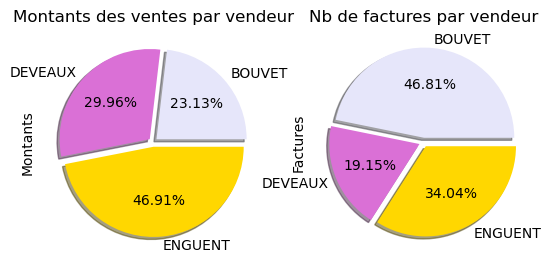

In [55]:
fig, axs = plt.subplots(1,2)

df_sum_size['sum'].plot(kind='pie', ax=axs[0],
              autopct='%.2f%%',
              colors=['lavender', 'orchid','gold'],
              explode=[0.05, 0.05, 0.05],
              shadow=True, 
              title='Montants des ventes par vendeur',
              ylabel='Montants')

df_sum_size['size'].plot(kind='pie', ax=axs[1],
              autopct='%.2f%%',
              colors=['lavender', 'orchid','gold'],
              explode=[0.05, 0.05, 0.05],
              shadow=True,
              title='Nb de factures par vendeur' , 
              ylabel='Factures')

